In [1]:
import pandas as pd

# 設定檔案路徑
file_path = r"D:\Profile\3363\Documents\creditcard_2023.csv"

# 讀取CSV檔案
data = pd.read_csv(file_path)

# 顯示資料的前幾列
print(data.head())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [2]:
# 檢查遺失值
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # 只保留有遺失值的列

# 顯示有遺失值的列及其數量
print("遺失值統計:")
print(missing_values)


遺失值統計:
Series([], dtype: int64)


C:\Users\3363\AppData\Local\Temp\ipykernel_17060\1999778651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')


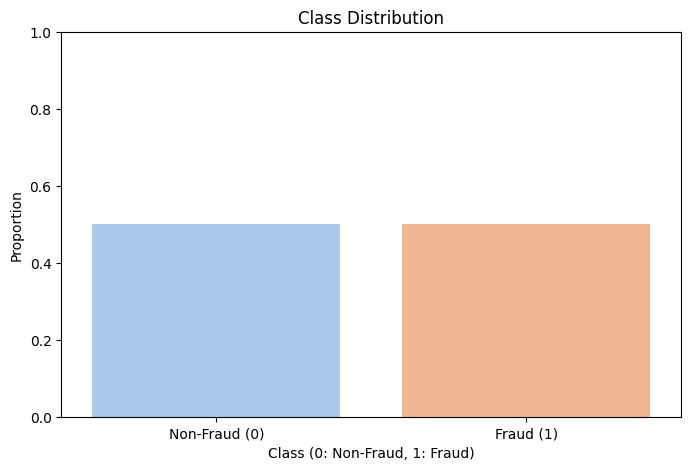

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 計算 Class 列的比例
class_counts = data['Class'].value_counts(normalize=True)

# 繪製條形圖
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.ylim(0, 1)
plt.show()


In [7]:
import pandas as pd

# 設定檔案路徑
file_path = r"D:\Profile\3363\Documents\creditcard_2023.csv"

# 讀取CSV檔案
data = pd.read_csv(file_path)

# 確認 Class 的比例
class_counts = data['Class'].value_counts(normalize=True)
print("Class proportion:\n", class_counts)

# 隨機刪除 30% 的詐騙交易
fraud_data = data[data['Class'] == 1]
non_fraud_data = data[data['Class'] == 0]

# 隨機選擇 30% 的詐騙交易作為測試集
test_set = fraud_data.sample(frac=0.3, random_state=42)

# 從原始數據中刪除這些欺詐交易
data = data.drop(test_set.index)

# 儲存訓練集到 CSV 檔案
train_file_path = r"D:\Profile\3363\Documents\creditcard_training_set.csv"
data.to_csv(train_file_path, index=False)

# 儲存測試集到 CSV 檔案
test_file_path = r"D:\Profile\3363\Documents\creditcard_test_set.csv"
test_set.to_csv(test_file_path, index=False)

# 確認儲存成功
print(f"Training set saved to {train_file_path}")
print(f"Test set saved to {test_file_path}")



Class proportion:
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64
Training set saved to D:\Profile\3363\Documents\creditcard_training_set.csv
Test set saved to D:\Profile\3363\Documents\creditcard_test_set.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\1880521932.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel', linewidth=1)


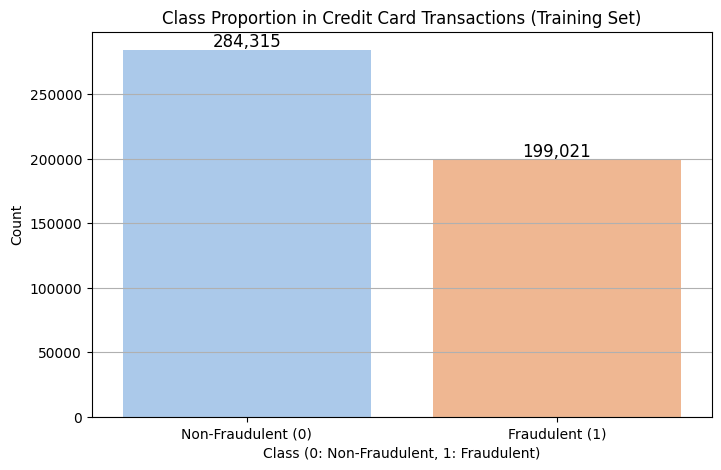

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定檔案路徑
train_file_path = r"C:\Users\Admin\Documents\不平衡\creditcard_training_set.csv"

# 讀取訓練集CSV檔案
data = pd.read_csv(train_file_path)

# 確認 Class 的比例
class_counts = data['Class'].value_counts()

# 繪製類別比例的條形圖
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel', linewidth=1)

# 在每個條形上顯示筆數
for i in range(len(class_counts)):
    plt.text(i, class_counts.values[i], f'{class_counts.values[i]:,.0f}', 
             ha='center', va='bottom', fontsize=12)

plt.title('Class Proportion in Credit Card Transactions (Training Set)')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.grid(axis='y')

# 顯示圖形
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
from sdmetrics.reports.single_table import QualityReport
from imblearn.over_sampling import SMOTE

# 設定檔案路徑
file_path = r"C:\Users\Admin\Documents\不平衡\creditcard_training_set.csv"

# 讀取CSV檔案
data = pd.read_csv(file_path)

# -----------------------------
# 使用CTGAN生成合成數據
# -----------------------------

# 設定metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# 選擇模型
model = CTGANSynthesizer(metadata)

# 訓練模型
model.fit(data)

# 取樣合成數據
synthetic_data_ctgan = model.sample(num_rows=len(data))

# 使用sdmetrics評估合成數據質量
report_ctgan = QualityReport()
report_ctgan.generate(data, synthetic_data_ctgan, metadata.to_dict())

# 打印CTGAN的評估報告
print("CTGAN Quality Report Score:")
print(report_ctgan.get_score())

# -----------------------------
# 使用SMOTE生成合成數據
# -----------------------------

# 分開特徵和標籤
X = data.drop('Class', axis=1)
y = data['Class']

# 使用SMOTE生成合成數據
smote = SMOTE(random_state=42)  # 設定隨機種子以保證可重現性
X_resampled, y_resampled = smote.fit_resample(X, y)

# 將特徵和標籤合併
synthetic_data_smote = pd.DataFrame(X_resampled, columns=X.columns)
synthetic_data_smote['Class'] = y_resampled

# 使用sdmetrics評估SMOTE合成數據質量
report_smote = QualityReport()
report_smote.generate(data, synthetic_data_smote, metadata.to_dict())

# 打印SMOTE的評估報告
print("SMOTE Quality Report Score:")
print(report_smote.get_score())

# 儲存合成數據（可選）
# 儲存合成數據（可選）
synthetic_data_ctgan.to_csv('D:\\Profile\\3363\\Documents\\synthetic_creditcard_data_ctgan.csv', index=False)
synthetic_data_smote.to_csv('D:\\Profile\\3363\\Documents\\synthetic_creditcard_data_smote.csv', index=False)


c:\Users\3363\AppData\Local\Programs\Python\Python312\Lib\site-packages\sdv\single_table\base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\3363\AppData\Local\Programs\Python\Python312\Lib\site-packages\sdv\single_table\base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:07<00:00,  4.18it/s]|
Column Shapes Score: 95.16%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [00:59<00:00,  7.81it/s]|
Column Pair Trends Score: 93.39%

Overall Score (Average): 94.28%

CTGAN Quality Report Score:
0.9427644912359197
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:09<00:00,  3.38it/s]|
Column Shapes Score: 95.48%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [01:08<00:00,  6.76it/s]|
Column Pair Trends Score: 98.83%

Overall Score (Average): 97.15%

SMOTE Quality Report Score:
0.9715479177608691


C:\Users\3363\AppData\Local\Temp\ipykernel_17060\88955101.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=data, x='Class', palette='Blues')
C:\Users\3363\AppData\Local\Temp\ipykernel_17060\88955101.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=synthetic_data_ctgan, x='Class', palette='Greens')
C:\Users\3363\AppData\Local\Temp\ipykernel_17060\88955101.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.countplot(data=synthetic_data_smote, x='Class', palette='Reds')


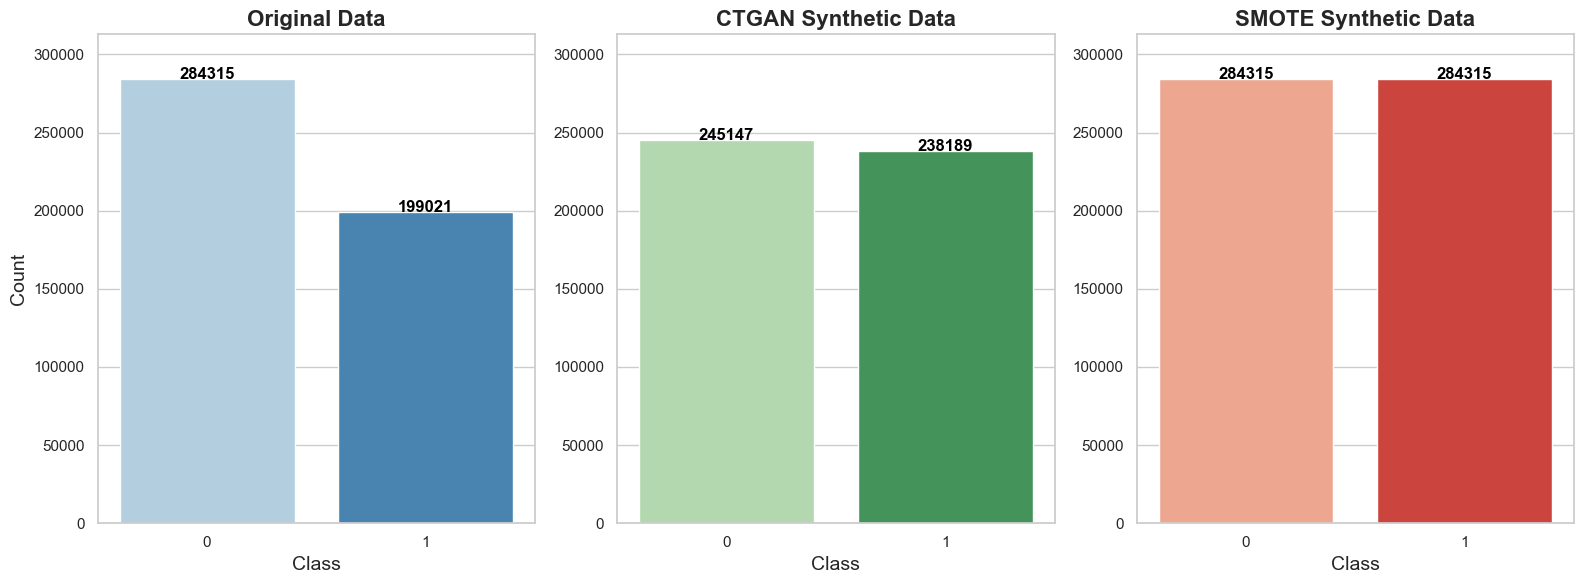

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 設定 Seaborn 的風格
sns.set(style="whitegrid")

# 設定繪圖的尺寸
plt.figure(figsize=(16, 6))

# 定義標記數字的函數
def add_counts(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}', 
                ha="center", fontsize=12, color="black", fontweight="bold")

# 第一個子圖：原始數據的 Class 分布
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=data, x='Class', palette='Blues')
add_counts(ax1)
plt.title('Original Data', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, max(data['Class'].value_counts().max(), 
                synthetic_data_ctgan['Class'].value_counts().max(), 
                synthetic_data_smote['Class'].value_counts().max()) * 1.1)  # 統一Y軸

# 第二個子圖：CTGAN生成數據的 Class 分布
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=synthetic_data_ctgan, x='Class', palette='Greens')
add_counts(ax2)
plt.title('CTGAN Synthetic Data', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('')  # 不重複顯示 y 標籤
plt.ylim(0, max(data['Class'].value_counts().max(), 
                synthetic_data_ctgan['Class'].value_counts().max(), 
                synthetic_data_smote['Class'].value_counts().max()) * 1.1)  # 統一Y軸

# 第三個子圖：SMOTE生成數據的 Class 分布
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=synthetic_data_smote, x='Class', palette='Reds')
add_counts(ax3)
plt.title('SMOTE Synthetic Data', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('')
plt.ylim(0, max(data['Class'].value_counts().max(), 
                synthetic_data_ctgan['Class'].value_counts().max(), 
                synthetic_data_smote['Class'].value_counts().max()) * 1.1)  # 統一Y軸

# 調整佈局，避免重疊
plt.tight_layout()

# 顯示圖表
plt.show()

In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 資料準備
# 替換成你實際的數據
X_train_original = data.drop('Class', axis=1)
y_train_original = data['Class']

X_train_ctgan = synthetic_data_ctgan.drop('Class', axis=1)
y_train_ctgan = synthetic_data_ctgan['Class']

X_train_smote = synthetic_data_smote.drop('Class', axis=1)
y_train_smote = synthetic_data_smote['Class']

X_test = test_set.drop('Class', axis=1)
y_test = test_set['Class']

# 訓練 XGBoost 模型的函數
def train_xgboost(X_train, y_train):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    return model

# 評估模型的函數
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    return accuracy, precision, recall, f1

# 訓練模型並進行比較
print("Evaluating with Original Data:")
model_original = train_xgboost(X_train_original, y_train_original)
evaluate_model(model_original, X_test, y_test)

print("\nEvaluating with CTGAN Synthetic Data:")
model_ctgan = train_xgboost(X_train_ctgan, y_train_ctgan)
evaluate_model(model_ctgan, X_test, y_test)

print("\nEvaluating with SMOTE Synthetic Data:")
model_smote = train_xgboost(X_train_smote, y_train_smote)
evaluate_model(model_smote, X_test, y_test)


Evaluating with Original Data:


c:\Users\3363\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9995
Precision: 1.0000
Recall: 0.9995
F1 Score: 0.9998

Evaluating with CTGAN Synthetic Data:


c:\Users\3363\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9435
Precision: 1.0000
Recall: 0.9435
F1 Score: 0.9709

Evaluating with SMOTE Synthetic Data:


c:\Users\3363\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9996
Precision: 1.0000
Recall: 0.9996
F1 Score: 0.9998


(0.9995896546064201, 1.0, 0.9995896546064201, 0.9997947851987359)

In [8]:
import pandas as pd

# 讀取訓練集CSV檔案
training_set = pd.read_csv(r"C:\Users\Admin\Documents\不平衡\creditcard_training_set.csv")
test_set  = pd.read_csv(r"C:\Users\Admin\Documents\不平衡\creditcard_test_set.csv")
synthetic_creditcard_data_ctgan = pd.read_csv(r"C:\Users\Admin\Documents\不平衡\synthetic_creditcard_data_ctgan.csv")
synthetic_creditcard_data_smote = pd.read_csv(r"C:\Users\Admin\Documents\不平衡\synthetic_creditcard_data_smote.csv")

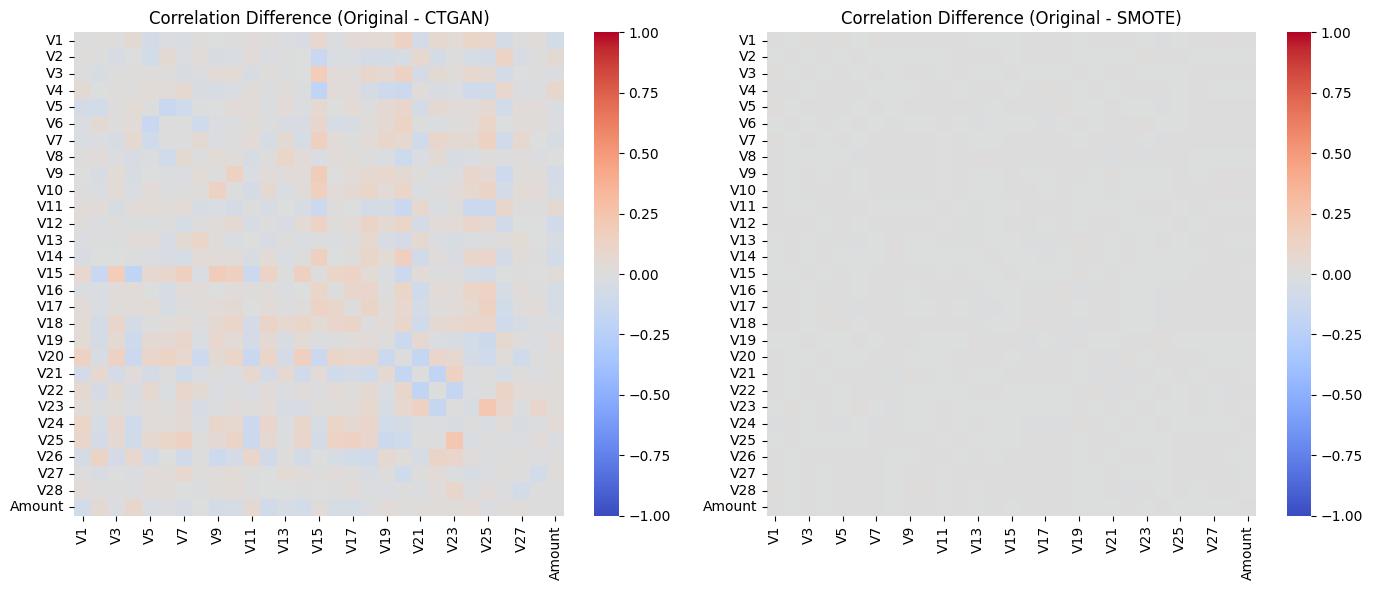

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 合併原始的訓練集與測試集
original_data = pd.concat([training_set, test_set])

# 選擇需要進行相關係數分析的數值型特徵
columns_of_interest = [col for col in original_data.columns if col not in ['id', 'Class']]  # 假設 'id' 和 'Class' 不是數值型特徵

# 計算相關係數矩陣
original_corr = original_data[columns_of_interest].corr()
ctgan_corr = synthetic_creditcard_data_ctgan[columns_of_interest].corr()
smote_corr = synthetic_creditcard_data_smote[columns_of_interest].corr()

# 計算差異矩陣：原始減CTGAN，原始減SMOTE
diff_corr_ctgan = original_corr - ctgan_corr
diff_corr_smote = original_corr - smote_corr

# 繪製差異熱力圖設置
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 原始數據與CTGAN生成數據的相關係數差異熱力圖
sns.heatmap(diff_corr_ctgan, ax=axes[0], cmap='coolwarm', vmin=-1, vmax=1, annot=False)
axes[0].set_title('Correlation Difference (Original - CTGAN)')

# 原始數據與SMOTE生成數據的相關係數差異熱力圖
sns.heatmap(diff_corr_smote, ax=axes[1], cmap='coolwarm', vmin=-1, vmax=1, annot=False)
axes[1].set_title('Correlation Difference (Original - SMOTE)')

# 顯示圖表
plt.tight_layout()
plt.show()



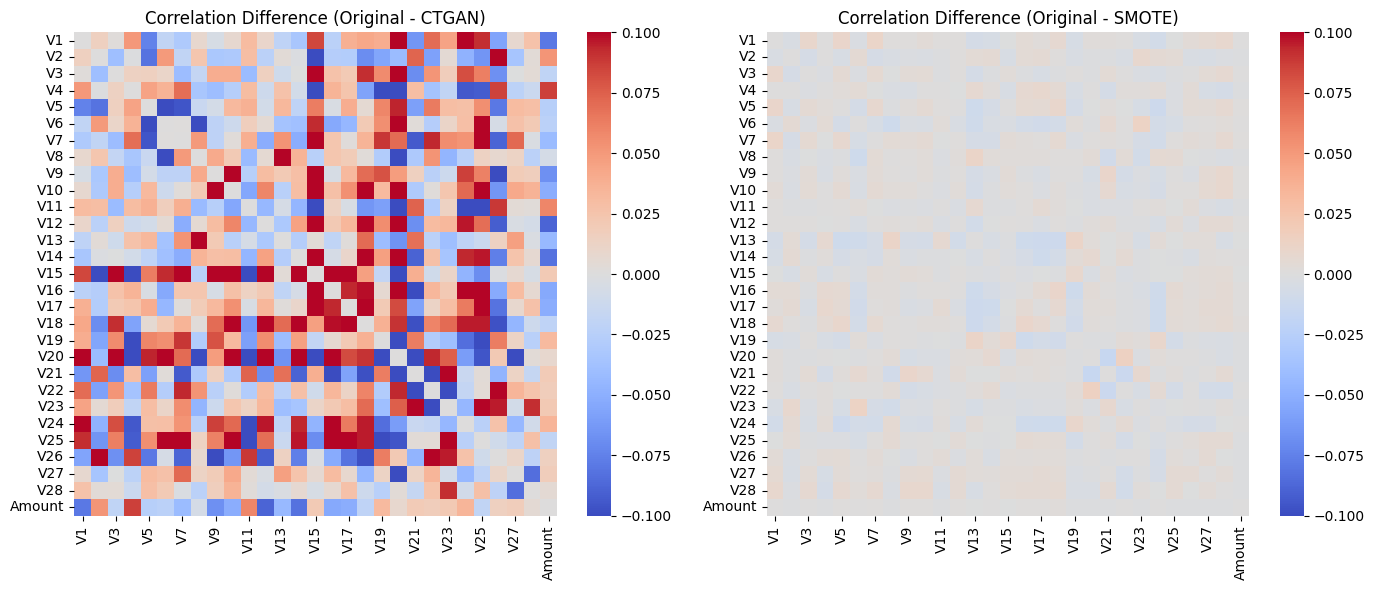

In [11]:
# 繪製差異熱力圖設置
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 原始數據與CTGAN生成數據的相關係數差異熱力圖
sns.heatmap(diff_corr_ctgan, ax=axes[0], cmap='coolwarm', vmin=-0.1, vmax=0.1, annot=False)  # 調整vmin和vmax
axes[0].set_title('Correlation Difference (Original - CTGAN)')

# 原始數據與SMOTE生成數據的相關係數差異熱力圖
sns.heatmap(diff_corr_smote, ax=axes[1], cmap='coolwarm', vmin=-0.1, vmax=0.1, annot=False)  # 調整vmin和vmax
axes[1].set_title('Correlation Difference (Original - SMOTE)')

# 顯示圖表
plt.tight_layout()
plt.show()


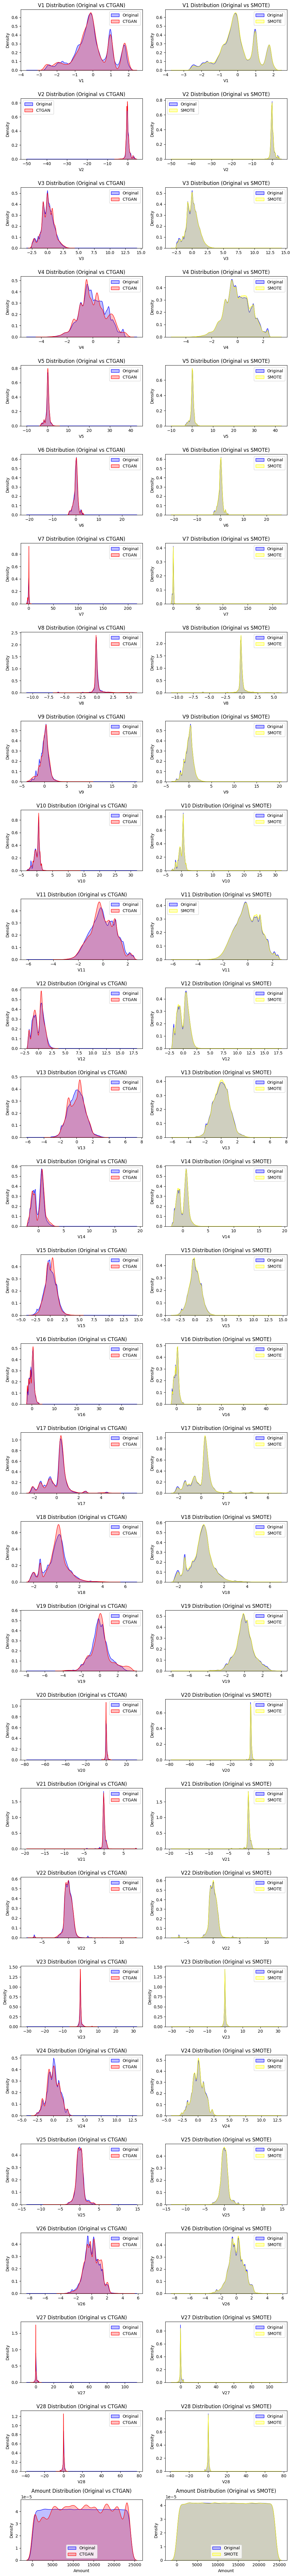

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 設置畫布，將一行顯示兩張圖
# 篩選不需要繪製的變數，假設 id 和 Class 是不需要的變數
columns_to_plot = [column for column in original_data.columns if column not in ['id', 'Class']]

fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(10, len(columns_to_plot) * 3))  # 調整figsize

# 逐變數比較分布
for i, column in enumerate(columns_to_plot):
    # 原始數據 vs CTGAN生成數據
    sns.kdeplot(data=original_data[column], label='Original', ax=axes[i, 0], color='blue', fill=True)
    sns.kdeplot(data=synthetic_creditcard_data_ctgan[column], label='CTGAN', ax=axes[i, 0], color='red', fill=True)
    axes[i, 0].set_title(f'{column} Distribution (Original vs CTGAN)')
    axes[i, 0].legend()

    # 原始數據 vs SMOTE生成數據
    sns.kdeplot(data=original_data[column], label='Original', ax=axes[i, 1], color='blue', fill=True)
    sns.kdeplot(data=synthetic_creditcard_data_smote[column], label='SMOTE', ax=axes[i, 1], color='yellow', fill=True)
    axes[i, 1].set_title(f'{column} Distribution (Original vs SMOTE)')
    axes[i, 1].legend()

# 調整佈局
plt.tight_layout()

# 儲存圖表為圖像文件
plt.savefig('distributions_comparison.png', dpi=300, bbox_inches='tight')  # 儲存圖像
plt.show()

